<a href="https://colab.research.google.com/github/s24966904/note/blob/main/lstm%E7%BE%8E%E5%85%83%E5%8C%AF%E7%8E%87%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

參考來源
https://www.youtube.com/watch?v=QIUxPv5PJOY

In [2]:
import pandas as pd

data=pd.read_csv("/content/drive/MyDrive/預測匯率/美元.csv")

In [ ]:

def buildTrain(train, pastDay=30, futureDay=5):
  X_train, Y_train = [], []
  for i in range(train.shape[0]-futureDay-pastDay):
    X_train.append(np.array(train.iloc[i:i+pastDay]))
    Y_train.append(np.array(train.iloc[i+pastDay:i+pastDay+futureDay]["Adj Close"]))
  return np.array(X_train), np.array(Y_train)

In [ ]:
eu["rate"]=eu["現金"]
eu=eu.drop(["現金"],axis=1)
eu

,rate
0,33.14
1,33.01
2,32.81
3,32.86
4,32.84
...,...
741,35.45
742,35.62
743,35.39
744,35.24


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21295 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21295 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0, flags=flags)


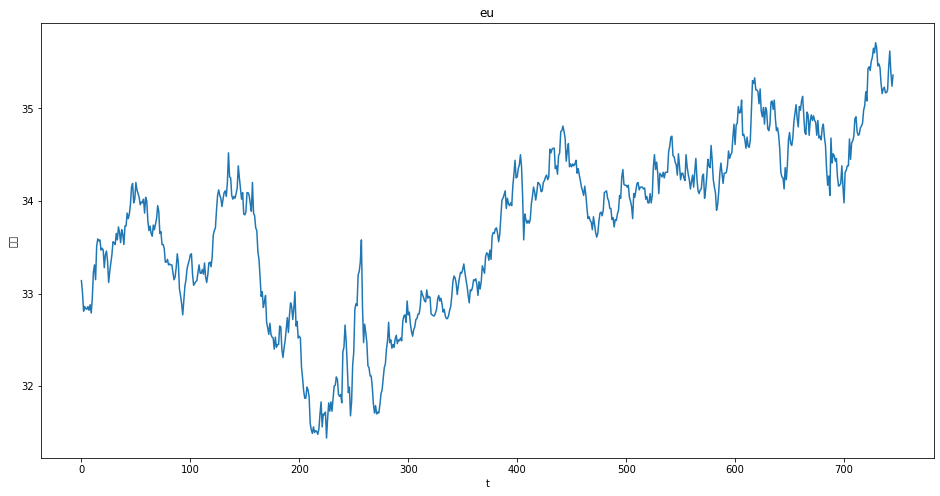

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("eu")
plt.plot(eu)
plt.xlabel("t")
plt.ylabel("匯率")
plt.show()


In [ ]:
import math
dataset = eu.values

training_data_len = math.ceil(len(dataset)*.8)
training_data_len

597

In [ ]:
#標準化資料
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.39812646],
       [0.3676815 ],
       [0.32084309],
       [0.33255269],
       [0.32786885],
       [0.32552693],
       [0.33255269],
       [0.32318501],
       [0.33723653],
       [0.31615925],
       [0.35362998],
       [0.41920375],
       [0.43793911],
       [0.40046838],
       [0.48477752],
       [0.50351288],
       [0.49882904],
       [0.50117096],
       [0.47540984],
       [0.48009368],
       [0.47540984],
       [0.43091335],
       [0.46370023],
       [0.47306792],
       [0.44730679],
       [0.39344262],
       [0.42154567],
       [0.44262295],
       [0.46370023],
       [0.49648712],
       [0.4941452 ],
       [0.48946136],
       [0.5175644 ],
       [0.50117096],
       [0.53395785],
       [0.51990632],
       [0.4941452 ],
       [0.52693208],
       [0.51522248],
       [0.48946136],
       [0.53629977],
       [0.53629977],
       [0.56908665],
       [0.55503513],
       [0.56674473],
       [0.59016393],
       [0.63466042],
       [0.644

In [ ]:
train_data =scaled_data[0:training_data_len,:]

x_train =[]
y_train =[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.39812646, 0.3676815 , 0.32084309, 0.33255269, 0.32786885,
       0.32552693, 0.33255269, 0.32318501, 0.33723653, 0.31615925,
       0.35362998, 0.41920375, 0.43793911, 0.40046838, 0.48477752,
       0.50351288, 0.49882904, 0.50117096, 0.47540984, 0.48009368,
       0.47540984, 0.43091335, 0.46370023, 0.47306792, 0.44730679,
       0.39344262, 0.42154567, 0.44262295, 0.46370023, 0.49648712,
       0.4941452 , 0.48946136, 0.5175644 , 0.50117096, 0.53395785,
       0.51990632, 0.4941452 , 0.52693208, 0.51522248, 0.48946136,
       0.53629977, 0.53629977, 0.56908665, 0.55503513, 0.56674473,
       0.59016393, 0.63466042, 0.6440281 , 0.59484778, 0.60421546,
       0.64637002, 0.62763466, 0.61826698, 0.6088993 , 0.59016393,
       0.5971897 , 0.59484778, 0.60421546, 0.56908665, 0.6088993 ])]
[0.5995316159250583]



In [ ]:
import numpy as np

x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(537, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

537/537 [==============================] - 15s 22ms/step - loss: 0.0165


In [ ]:
test_data = scaled_data[training_data_len -60:,:]

x_test = []
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.3729539889137216

In [ ]:
train = eu[:training_data_len]
valid = eu[training_data_len:]
valid["Predictions"] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
valid 

,rate,Predictions
597,34.52,34.092178
598,34.69,34.121399
599,34.83,34.162216
600,34.61,34.217510
601,34.82,34.254597
...,...,...
741,35.45,34.840225
742,35.62,34.845203
743,35.39,34.880928
744,35.24,34.907867


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


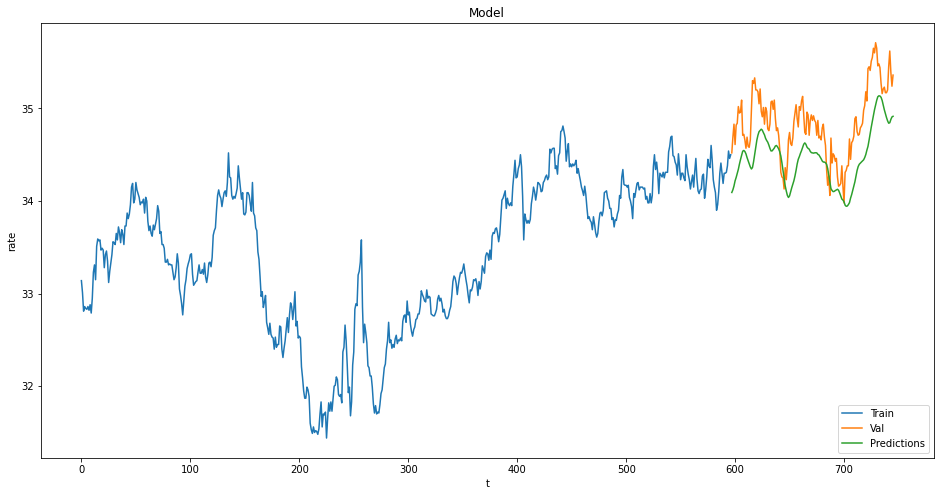

In [ ]:
train = eu[:training_data_len]
valid = eu[training_data_len:]
valid["Predictions"] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("t")
plt.ylabel("rate")
plt.plot(train["rate"])
plt.plot(valid[["rate","Predictions"]])
plt.legend(["Train","Val","Predictions"],loc="lower right")
plt.show()

In [ ]:
valid

,rate,Predictions
597,34.52,34.092178
598,34.69,34.121399
599,34.83,34.162216
600,34.61,34.217510
601,34.82,34.254597
...,...,...
741,35.45,34.840225
742,35.62,34.845203
743,35.39,34.880928
744,35.24,34.907867
